In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random

class FourRoomsEnvironment():
    def __init__(self, start_loc=(1, 1), goal_loc=(7, 9)):
        self.grid = self._createGrid(goal_loc)
        self.start_loc = start_loc
        if self.start_loc == "random":
            self.state = self._generateRandomState()
        else:
            self.state = self.start_loc   # tuple (r, c)
        self.done = 0.                    # flag for episode termination
    
    # Create grid as a numpy array containing :
    # -1 at every inaccessible location
    # 0 at every valid location except goal
    # 1 at goal
    def _createGrid(self, goal_loc, border_value=-1, goal_value=1):
        grid = np.zeros((13, 13))
        
        # Create borders and horizontal and vertical central walls
        grid[:, 0] = grid[:, 12] = grid[0, :] = grid[12, :] = \
        grid[6, 1] = grid[6, 3:6] = grid[7, 7:9] = grid[7, 10:12] = \
        grid[1:3, 6] = grid[4:10, 6] = grid[11, 6] = border_value
        
        # Create goal
        grid[goal_loc] = 1
        
        return grid

    def _generateRandomState(self):
        row_indices, col_indices = np.where(self.grid == 0)
        valid_locs = zip(list(row_indices), list(col_indices))
        return random.choice(valid_locs)
    
    def step(self, action):
        r, c = self.state
        
        # Create a list of 9 reachable locations (6 move successes, 3 failures)
        # p(success) = 2 / 3, p(failure) = 1 / 3
        reachable_locs = [(r, c - 1), (r, c + 1), (r - 1, c), (r + 1, c)]
        if action == "left":
            reachable_locs += [(r, c -1)] * 5
        elif action == "right":
            reachable_locs += [(r, c + 1)] * 5
        elif action == "up":
            reachable_locs += [(r - 1, c)] * 5
        elif action == "down":
            reachable_locs += [(r + 1, c)] * 5
        else:
            print "Action should be 'left', 'right', 'up', or 'down'"
            return 
        
        # Select target location randomly
        target_loc = reachable_locs[random.randint(0, 8)]
            
        # If action leads to a wall, stay in place with reward 0
        if self.grid[target_loc] < 0:
            reward = 0.
            
        # If action leads to non-goal valid cell, move with reward 0
        # If it leads to a goal cell, move with reward 1, and set done to True
        else:
            self.state = target_loc
            reward = self.done = self.grid[target_loc]
        
        return self.state, reward, self.done

    def reset(self):
        if self.start_loc == "random":
            self.state = self._generateRandomState()
        else:
            self.state = self.start_loc
        self.done = 0.
        return self.state
    
    def render(self):
        plt.imshow(self.grid)
        plt.colorbar()
        plt.show()

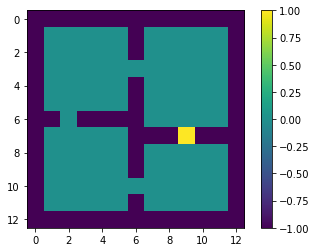

random
(10, 2)
(2, 2)


In [38]:
env = FourRoomsEnvironment(start_loc="random")
env.render()

print env.start_loc
print env.state

state = env.reset()
print env.state